In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df=pd.read_csv("../data/processed/df_with_clusters.csv")
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,Cluster
0,-1.148577,0.818182,-0.521215,-5.199338,0.166667,0.00,-1.567240,-1.334223,-0.988642,0.000000,0
1,1.028273,0.909091,-5.199338,1.931194,0.000000,0.25,0.793110,1.307333,0.872013,0.222222,1
2,0.802715,1.000000,0.414307,-5.199338,1.000000,0.00,0.911217,-0.307658,0.474946,0.000000,0
3,-0.068391,1.000000,-0.731896,-5.199338,0.083333,0.00,-1.132013,-0.235555,-0.163159,0.000000,0
4,0.557312,1.000000,0.780930,-5.199338,0.666667,0.00,-0.594353,0.377744,1.518141,0.000000,0


# clustered Data Visulaization

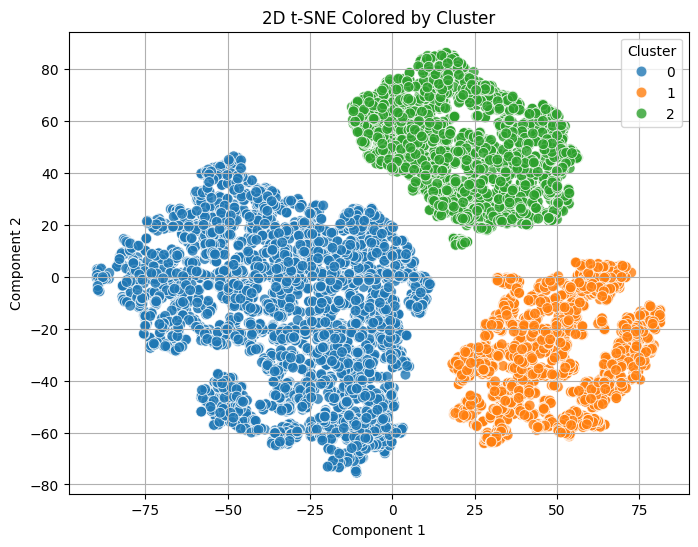

In [48]:
from sklearn.manifold import TSNE

features = df.drop(columns=['Cluster'])  # Exclude 'Cluster' from t-SNE

tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(features)
tsne_df_2d = pd.DataFrame(data=tsne_components, columns=['TSNE1', 'TSNE2'])
tsne_df_2d['Cluster'] = df['Cluster']  # Add cluster labels for coloring

plt.figure(figsize=(8, 6))
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Cluster', data=tsne_df_2d, palette='tab10', s=60, alpha=0.8)
plt.title('2D t-SNE Colored by Cluster')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.legend(title='Cluster')
plt.show()


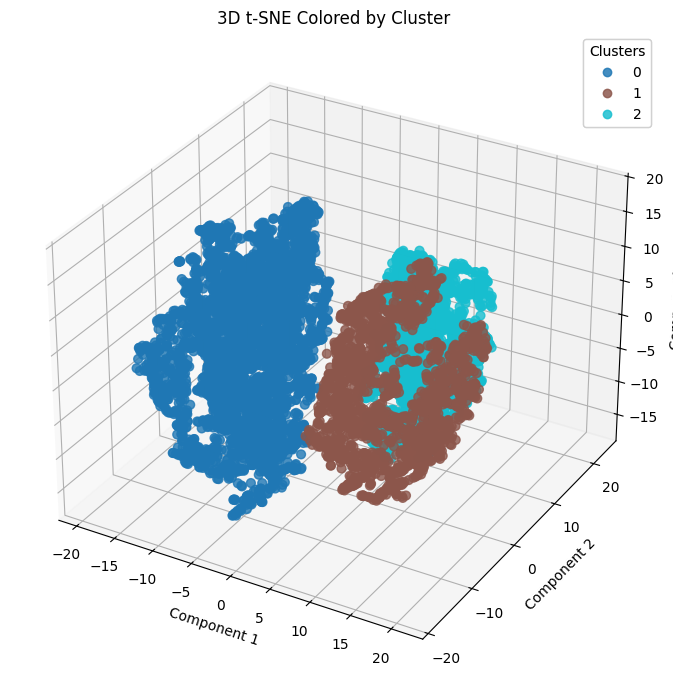

In [49]:
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

features = df.drop(columns=['Cluster'])

tsne_3d = TSNE(n_components=3, random_state=42)
tsne_components = tsne_3d.fit_transform(features)
tsne_df_3d = pd.DataFrame(tsne_components, columns=['TSNE1', 'TSNE2', 'TSNE3'])
tsne_df_3d['Cluster'] = df['Cluster']

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(
    tsne_df_3d['TSNE1'], tsne_df_3d['TSNE2'], tsne_df_3d['TSNE3'],
    c=tsne_df_3d['Cluster'], cmap='tab10', s=40, alpha=0.8
)

ax.set_title('3D t-SNE Colored by Cluster')
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

# Create legend for clusters
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)

plt.tight_layout()
plt.show()


# Clusters Description 

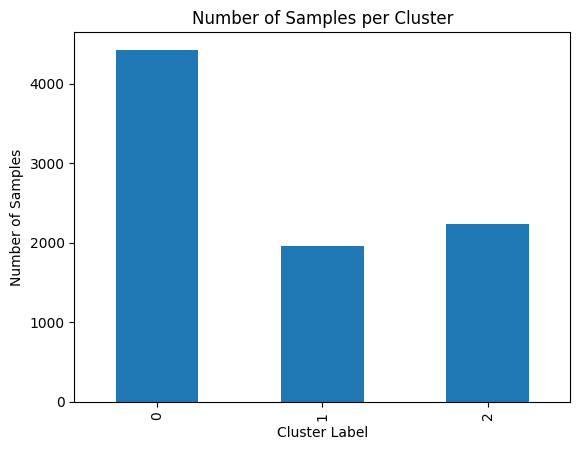

In [12]:
#counts of each cluster
df['Cluster'].value_counts().sort_index().plot(
    kind='bar',
    title='Number of Samples per Cluster'
)
plt.xlabel('Cluster Label')
plt.ylabel('Number of Samples')
plt.show()


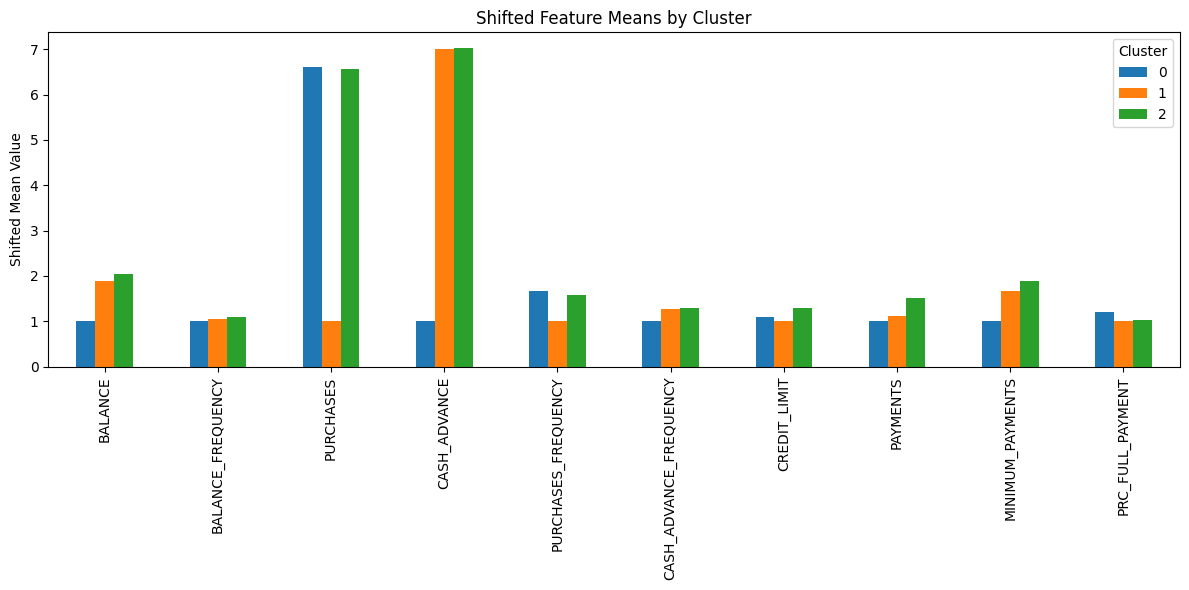

In [84]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
shifted_summary = cluster_summary - cluster_summary.min()+1

shifted_summary.T.plot(kind='bar', figsize=(12, 6), title='Shifted Feature Means by Cluster')
plt.ylabel('Shifted Mean Value')
plt.tight_layout()
plt.show()


In [85]:
cluster_summary

,BALANCE,BALANCE_FREQUENCY,PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
Cluster,,,,,,,,,,
0,-0.475769,0.861202,0.407399,-5.199338,0.673893,0.000000,-0.029970,-0.159476,-0.381002,0.258855
1,0.413105,0.903524,-5.199338,0.816488,0.000000,0.275626,-0.112260,-0.041922,0.281958,0.046053
2,0.576113,0.954817,0.357792,0.823171,0.580778,0.285690,0.169428,0.352147,0.506984,0.061936


##  Clustering Insights: Credit Card Customer Segmentation



##  Cluster 0: Heavy Cash Advance Users

**Key Characteristics:**
- Extremely **high negative CASH_ADVANCE (-5.20)** → heavy reliance on cash withdrawals.
- **CASH_ADVANCE_FREQUENCY = 0** → infrequent but very large transactions.
- **Below average BALANCE and CREDIT_LIMIT**.
- **Low PAYMENTS and MINIMUM_PAYMENTS**.
- **Moderate PRC_FULL_PAYMENT (0.26)**.

Insight: 
This group represents **high-risk users** who take large cash advances but repay irregularly. Likely experiencing financial strain.

Suggested Strategy:
- Monitor closely for credit risk.
- Consider financial counseling offers.
- Limit or condition cash advance features.




## Cluster 1: Cash-Only Users

**Key Characteristics:**
- **Very low PURCHASES (-5.20)** → do not use the card for buying goods/services.
- **PURCHASES_FREQUENCY = 0** → never use the card for typical spending.
- **High CASH_ADVANCE (0.82)** → mostly use card for withdrawing money.
- **Moderate MINIMUM_PAYMENTS (0.28)**.
- **Low PRC_FULL_PAYMENT (0.05)**.

Insight:  
These users treat credit cards like debit cards. Their behavior is **unusual and less profitable**.

Suggested Strategy:
- Promote card-based shopping benefits (e.g., points, discounts).
- Incentivize spending over cash advances.
- Assess for potential misuse or non-traditional usage patterns.

##  Cluster 2: Balanced & Responsible Users

**Key Characteristics:**
- **Above-average BALANCE (0.58)** and **PURCHASES (0.36)**.
- **High BALANCE_FREQUENCY (0.95)** → frequent and consistent usage.
- **Moderate CASH_ADVANCE (0.82)** and PURCHASES_FREQUENCY (0.58).
- **Highest CREDIT_LIMIT (0.17)**.
- **Strong PAYMENTS (0.35), MINIMUM_PAYMENTS (0.51)**.
- **Good PRC_FULL_PAYMENT (0.06)**.

Insight: 
This is the **most desirable segment**: engaged, consistent, and responsible credit card users.

Suggested Strategy:
- Prioritize retention through loyalty programs.
- Offer premium credit options or perks.
- Explore cross-selling and long-term engagement campaigns.


# **Summary**

### **Cluster 0 – Heavy Cash Advance Users**

This cluster is characterized by customers who frequently maintain low balances and make occasional purchases, but stand out for their extremely high use of **cash advances**—albeit in **infrequent, large amounts**. Despite regular card usage (high balance frequency), their **payments and minimum payments are relatively low**, suggesting potential credit risk. These users may rely on their credit card primarily for **emergency cash access** rather than routine spending, making them a group to monitor closely for financial strain.

---

### **Cluster 1 – Cash-Only Users**

Customers in this cluster avoid purchases entirely, instead depending on **cash advances** for their credit card use. With **zero purchase frequency**, **moderate cash advance activity**, and **lower credit limits**, they appear to treat their credit cards more like a **short-term borrowing tool** than a purchasing method. Their **payment behavior is minimal**, which—combined with limited credit capacity—may indicate financial instability or a lack of engagement with the credit system. These users present a **non-traditional usage pattern**.

---

### **Cluster 2 – Balanced & Responsible Users**

These customers represent the most **financially active and responsible segment**. They have **high balances**, make regular **purchases and payments**, and also use **cash advances** moderately. Their **credit limits are higher**, and they consistently meet their **minimum and full payments**, indicating good financial health and trustworthiness. This group is likely composed of **well-engaged, creditworthy users** who use their cards regularly and manage them effectively—making them ideal targets for rewards programs or credit limit increases.


# Additional Insights

**Tenure**

Above 90% of credit card users prefer a 12-month tenure, indicating a strong customer preference for shorter, manageable repayment periods. This may reflect a desire for predictable financial planning and faster debt clearance, suggesting that flexible and transparent short-term credit options could be more appealing to the majority of users. Financial institutions may consider offering more incentives or tailored products around this preferred duration to enhance customer satisfaction and retention.

# DashBoard

In [8]:
df.columns

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT',
       'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'Cluster'],
      dtype='object')

In [65]:
# 1. Define cluster names
cluster_name_map = {
    0: "Heavy Cash Advance Users",
    1: "Cash-Only Users",
    2: "Balanced & Responsible Users"
}

# 2. Add a new column with cluster names
df['Cluster_Name'] = df['Cluster'].map(cluster_name_map)


In [112]:
from dash import Dash, html, dcc, Input, Output
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import dash_bootstrap_components as dbc

# Example DataFrames (Replace with your actual data)
# df = pd.read_csv('your_data.csv')
# tsne_df_3d = pd.read_csv('your_tsne_data.csv')

cluster_name_map = {
    0: "Heavy Cash Advance Users",
    1: "Cash-Only Users",
    2: "Balanced & Responsible Users"
}

df['Cluster_Name'] = df['Cluster'].map(cluster_name_map)
tsne_df_3d['Cluster_Name'] = tsne_df_3d['Cluster'].map(cluster_name_map)

feature_cols = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'CASH_ADVANCE',
                'PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CREDIT_LIMIT',
                'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

cluster_order = [cluster_name_map[i] for i in sorted(cluster_name_map.keys())]

# Pie Chart
pie_fig = px.pie(
    df,
    names='Cluster_Name',
    title='Distribution of Customers by Cluster',
    color='Cluster_Name',
    category_orders={'Cluster_Name': cluster_order},
    color_discrete_sequence=px.colors.qualitative.Prism,
    hole=0.4
)
pie_fig.update_layout(
    title_x=0.5,
    title_font=dict(color='#469c8d', size=22),
    plot_bgcolor='#a19fb5',
    paper_bgcolor='#a19fb5'
)

# 3D t-SNE
fig3d = px.scatter_3d(
    tsne_df_3d,
    x='TSNE1',
    y='TSNE2',
    z='TSNE3',
    color='Cluster_Name',
    category_orders={'Cluster_Name': cluster_order},
    color_discrete_sequence=px.colors.qualitative.Prism,
    title='3D t-SNE Colored by Cluster',
    labels={'TSNE1': 'Component 1', 'TSNE2': 'Component 2', 'TSNE3': 'Component 3'},
    opacity=0.8,
    size_max=8
)
fig3d.update_layout(
    title_x=0.5,
    title_font=dict(color='#469c8d', size=22),
    showlegend=False,
    margin=dict(l=0, r=0, b=0, t=40),
    plot_bgcolor='#a19fb5',
    paper_bgcolor='#a19fb5'
)

# App Setup
app = Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])

app.layout = html.Div([
    dbc.Row([
        html.H1(
            "Credit Card Customer Segmentation",
            style={'textAlign': 'center', 'color': '#001f3f', 'marginTop': '20px', 'fontSize': '32px'}
        ),
        html.Br(),
        html.Hr(className="my-4", style={'height': '4px', 'backgroundColor': '#001f3f', 'border': 'none'})
    ]),
    dbc.Row([
        dbc.Col([
            html.Div([
                html.H2("Customer Segmentation Analysis", style={
                    'color': '#469c8d',
                    'textAlign': 'center',
                    'fontWeight': 'bold',
                    'fontSize': '26px'
                }),
                html.P("This dashboard presents insights from clustering credit card customers "
                       "based on their transaction behaviors and financial patterns.",
                       style={'fontSize': '18px'}),
                html.H4("Heavy Cash Advance Users", style={'color': '#469c8d', 'marginTop': '20px'}),
                html.P("Customers who rely heavily on large, infrequent cash advances. They tend to have lower "
                       "credit limits, lower repayment activity, and represent higher financial risk.", style={'fontSize': '18px'}),
                html.H4("Cash-Only Users", style={'color': '#469c8d', 'marginTop': '20px'}),
                html.P("These users rarely make purchases and primarily use their cards for cash withdrawals. "
                       "They show limited engagement with typical credit card benefits and lower repayment ratios.", style={'fontSize': '18px'}),
                html.H4("Balanced & Responsible Users", style={'color': '#469c8d', 'marginTop': '20px'}),
                html.P("A highly engaged group that uses credit cards regularly for purchases and payments. "
                       "They maintain good repayment habits and represent the most desirable customer segment.", style={'fontSize': '18px'}),
                html.P("Use the feature selector to explore how each financial behavior varies across clusters.",
                       style={'marginTop': '15px', 'fontSize': '18px'})
            ], style={'backgroundColor': '#a19fb5', 'padding': '20px', 'borderRadius': '8px'})
        ], width=6),

        dbc.Col([
            dcc.Graph(id='dim3-chart', figure=pie_fig, style={'height': '500px'})
        ], width=6),
    ]),

    html.Br(),

    dbc.Row([
        dbc.Col([
            html.Br(), html.Br(), html.Br(),
            dcc.Graph(id='pie-chart', figure=fig3d, style={'height': '500px'})
        ], width=6),

        dbc.Col([
            html.Div([
                dbc.Row([
                    dbc.Col(html.Label("Select a Feature:", style={
                        'fontWeight': 'bold',
                        'marginBottom': '0',
                        'lineHeight': '38px',
                        'fontSize': '16px'
                    }), width="auto"),
                    dbc.Col(dcc.Dropdown(
                        id='feature-dropdown',
                        options=[{'label': col, 'value': col} for col in feature_cols],
                        value='BALANCE',
                        clearable=False,
                        style={'width': '200px', 'fontSize': '16px'}
                    ), width="auto")
                ], align='center')
            ], style={
                'backgroundColor': 'white',
                'padding': '10px 15px',
                'borderRadius': '5px',
                'marginBottom': '15px',
                'boxShadow': '0 2px 4px rgba(0,0,0,0.1)'
            }),
            dcc.Graph(id='feature-bar', style={'height': '500px'})
        ], width=6)
    ])
], style={'backgroundColor': '#a19fb5', 'padding': '20px'})


@app.callback(
    Output('feature-bar', 'figure'),
    Input('feature-dropdown', 'value')
)
def update_feature_bar(selected_feature):
    cluster_means = df.groupby('Cluster_Name')[selected_feature].mean().reset_index()
    min_val = cluster_means[selected_feature].min()
    max_val = cluster_means[selected_feature].max()
    cluster_means['Normalized'] = 1 + 9 * (cluster_means[selected_feature] - min_val) / (max_val - min_val) if max_val != min_val else 5

    fig = go.Figure(data=[
        go.Bar(
            x=cluster_means['Cluster_Name'],
            y=cluster_means['Normalized'],
            marker_color=px.colors.qualitative.Prism
        )
    ])
    fig.update_layout(
        title={
            'text': f'Scaled Mean {selected_feature} by Cluster (1 to 10)',
            'x': 0.5,
            'font': {'color': '#469c8d', 'size': 22}
        },
        xaxis_title='Cluster',
        yaxis_title=f'Scaled Mean {selected_feature}',
        xaxis=dict(title_font=dict(size=16)),
        yaxis=dict(title_font=dict(size=16), range=[0, 11]),
        plot_bgcolor='#a19fb5',
        paper_bgcolor='#a19fb5',
        margin=dict(t=40, b=40)
    )
    return fig

# Run app
app.run(debug=True)
